In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [34]:
calories = pd.read_csv(r"C:\Users\rajat\Documents\Machine Learning Imarticus\calorie burn prediction\calories.csv")
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [35]:
calories.shape

(15000, 2)

In [36]:
exercise_data = pd.read_csv(r"C:\Users\rajat\Documents\Machine Learning Imarticus\calorie burn prediction\exercise.csv")
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [37]:
exercise_data.shape

(15000, 8)

In [38]:
calorie_data = pd.concat([calories, exercise_data], axis = 1)
calorie_data.head()

,User_ID,Calories,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [39]:
calorie_data.drop('User_ID', axis = 1,inplace= True)

In [40]:
calorie_data.head()

,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [41]:
calorie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Calories    15000 non-null  float64
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 937.6+ KB


In [42]:
calorie_data.isnull().sum()

Calories      0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

In [43]:
calorie_data.describe()

,Calories,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,89.539533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,62.456978,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,35.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,79.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,138.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,314.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


<Axes: >

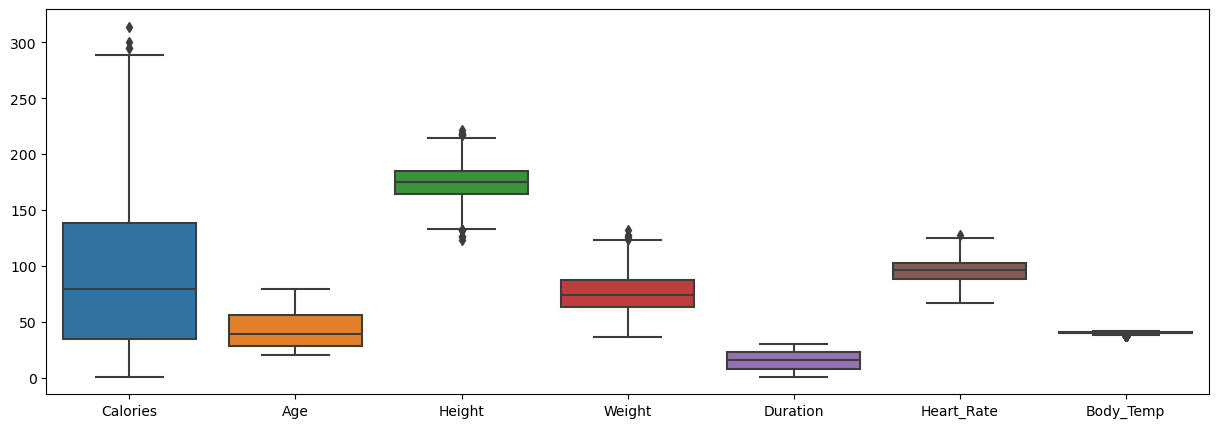

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
sns.boxplot(calorie_data)

<Axes: >

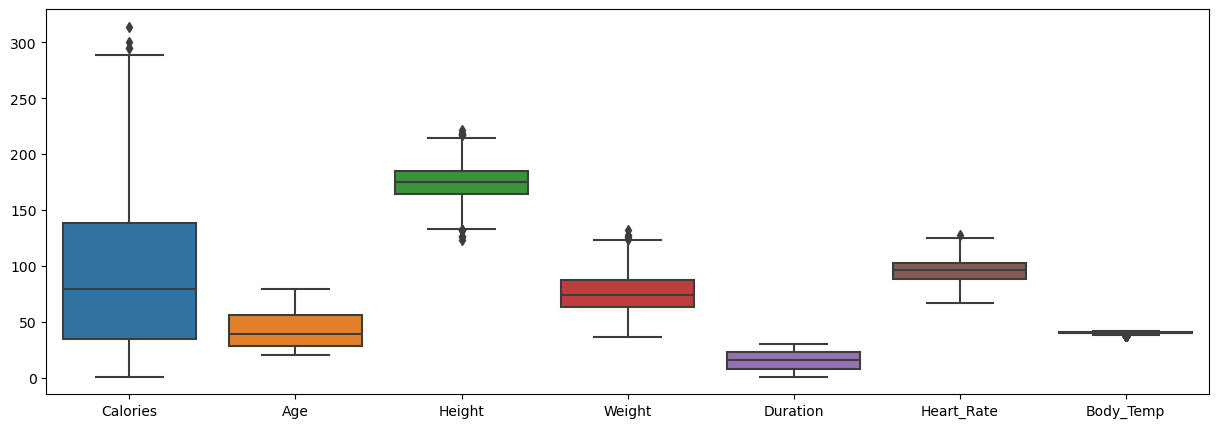

In [45]:
plt.figure(figsize=(15,5))

sns.boxplot(calorie_data)

<Axes: xlabel='Age', ylabel='Count'>

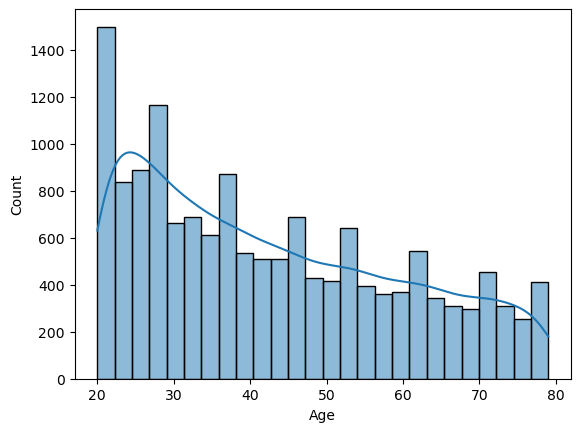

In [46]:
import warnings
warnings.filterwarnings('ignore')
sns.histplot(x = 'Age', data = calorie_data , kde = True)

<Axes: xlabel='Height', ylabel='Count'>

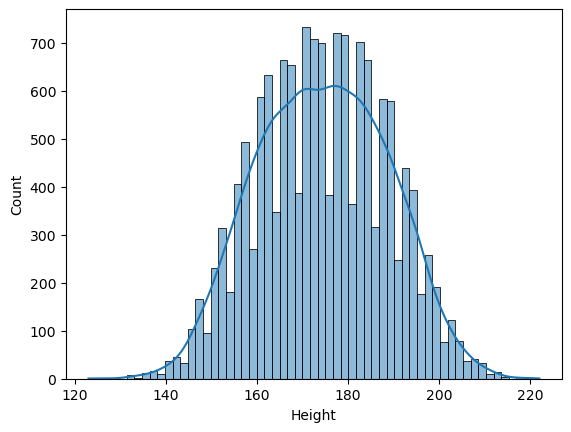

In [47]:
sns.histplot(x = 'Height', data = calorie_data , kde = True)

<Axes: xlabel='Weight', ylabel='Count'>

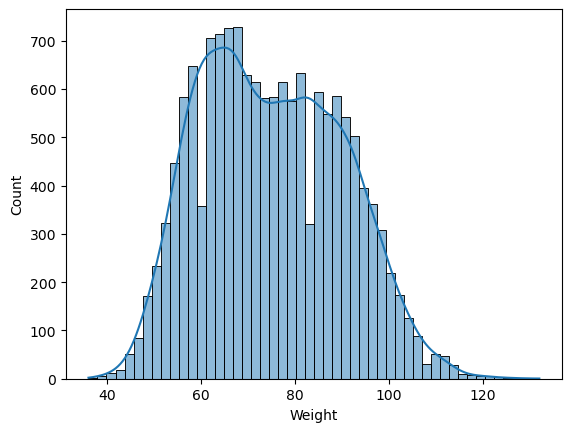

In [48]:
sns.histplot(x = 'Weight', data = calorie_data , kde = True)

In [49]:
# for i in calorie_data:                  # i = column name 
#     if calorie_data[i].dtypes in ("float64","int64"): # df[i] = every column will select float & int column only
#         q1 = calorie_data[i].quantile(0.25)  # for 1 column compute q1
#         q3 = calorie_data[i].quantile(0.75)  # for 1 column compute q3
#         iqr = q3-q1  # for 1 column compute IQR
#         ul = q3 + 1.5*iqr # for 1 column compute UPPER LIMIT
#         ll = q1 - 1.5*iqr # for 1 column compute LOWER LIMIT 
#         calorie_data[i].clip(lower=ll,upper=ul,inplace=True)

In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
numeric = calorie_data.select_dtypes(include = [np.number])

In [52]:
category = calorie_data.select_dtypes(include = 'object')

In [53]:
category = category.apply(LabelEncoder().fit_transform)

In [54]:
combined_data = pd.concat([numeric , category],axis = 1 )
combined_data.head()

,Calories,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Gender
0,231.0,68,190.0,94.0,29.0,105.0,40.8,1
1,66.0,20,166.0,60.0,14.0,94.0,40.3,0
2,26.0,69,179.0,79.0,5.0,88.0,38.7,1
3,71.0,34,179.0,71.0,13.0,100.0,40.5,0
4,35.0,27,154.0,58.0,10.0,81.0,39.8,0


In [55]:
from sklearn.model_selection import train_test_split

In [56]:
combined_data= combined_data.drop(columns=['Heart_Rate','Body_Temp'])

In [57]:
x = combined_data.drop('Calories', axis = 1)
y = combined_data[['Calories']]

In [58]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size= 0.20, random_state= 20)

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [60]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=20) # n_estimators is the number of trees
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=20)

In [61]:
y_pred = rf_model.predict(x_test)

In [62]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 157.3445838313889
R-squared: 0.9600101214170895


In [63]:
y_train_pred = rf_model.predict(x_train)

In [64]:
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Training Mean Squared Error: {train_mse}")
print(f"Training R-squared: {train_r2}")

Training Mean Squared Error: 22.71880924184604
Training R-squared: 0.9941626427965458


In [65]:
np.sqrt(x_train)

,Age,Height,Weight,Duration,Gender
7087,5.099020,13.527749,8.717798,4.000000,1.0
6539,4.582576,13.601471,9.110434,3.162278,1.0
8447,7.071068,13.527749,9.433981,4.795832,1.0
10988,7.483315,12.609520,7.810250,4.472136,0.0
12791,4.690416,13.266499,8.602325,4.358899,0.0
...,...,...,...,...,...
14729,4.898979,12.569805,7.483315,5.099020,0.0
7068,6.480741,12.767145,7.745967,1.732051,0.0
7391,5.916080,12.806248,8.062258,4.898979,0.0
4367,4.690416,12.922848,8.000000,3.605551,0.0


In [66]:
np.sqrt(y_train)

,Calories
7087,9.055385
6539,6.633250
8447,11.401754
10988,11.000000
12791,9.591663
...,...
14729,11.916375
7068,3.464102
7391,12.165525
4367,7.681146


In [67]:
rf = RandomForestRegressor(
    n_estimators=50, 
    max_depth=10, 
    min_samples_split=10, 
    min_samples_leaf=4, 
    random_state=42
)

rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print(f"Updated R² Score: {r2_score(y_test, y_pred)}")


Updated R² Score: 0.9644156762597624


In [68]:
rf = RandomForestRegressor(
    n_estimators=50, 
    max_depth=5, 
    min_samples_split=20, 
    min_samples_leaf=10, 
    random_state=42
)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print(f"Updated R² Score: {r2_score(y_test, y_pred)}")


Updated R² Score: 0.9574917140589548


In [69]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)

print(f"Linear Regression R² Score: {r2_score(y_test, lr_pred)}")


Linear Regression R² Score: 0.9349383772270882


In [72]:
from sklearn.metrics import classification_report 

In [76]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_test, y_test)
lr_pred = lr.predict(x_test)

print(f"Linear Regression R² Score: {r2_score(y_test, lr_pred)}")


Linear Regression R² Score: 0.935181831549761
